In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import sklearn

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelBinarizer

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, classification_report

from seaborn import heatmap

In [2]:
df = pd.read_csv("mars_train.csv", header=None, skiprows=0)
df

,0,1,2,3,4,5,6,7,8,9,...,3591,3592,3593,3594,3595,3596,3597,3598,3599,3600
0,0,0.29347,0.097823,0.034586,0.034586,0.0,0.0,0,0.00000,0,...,0,0.60678,0.20226,0.14302,0.14302,0.13484,0.40452,0,0.57208,1
1,0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0,0.12274,0,...,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,0.00000,1
2,0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0,0.00000,0,...,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,0.00000,1
3,0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0,0.00000,0,...,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,0.00000,1
4,0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0,0.00000,0,...,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,0.00000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0,0.00000,0,...,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,0.00000,2
1676,0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0,0.00000,0,...,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,0.00000,2
1677,0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0,0.00000,0,...,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,0.00000,2
1678,0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0,0.00000,0,...,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,0.00000,2


In [3]:
#on sépare les classes de jeu de données 
X = df.iloc[:, :-1]

y = df.iloc[:, -1]

Nombre réel de colonnes avec moyenne zéro : 800


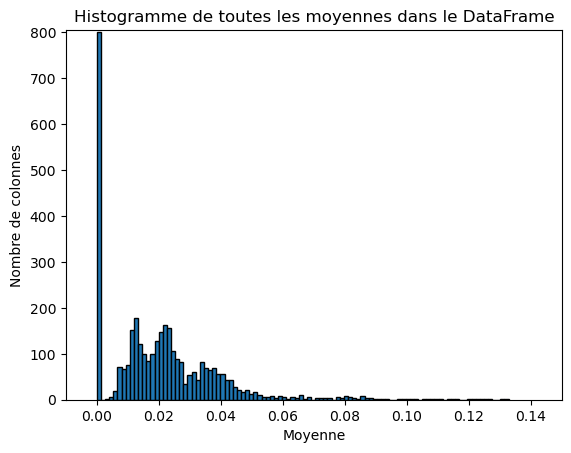

In [4]:
# Calculer les moyennes pour chaque colonne
moyennes = X.mean()

# Filtrer les colonnes avec une moyenne égale à zéro
colonnes_moyenne_zero = moyennes[moyennes == 0]

# Compter le nombre de colonnes avec unea moyenne égale à zéro
nombre_colonnes_moyenne_zero = len(colonnes_moyenne_zero)

print(f"Nombre réel de colonnes avec moyenne zéro : {nombre_colonnes_moyenne_zero}")

# Créer un histogramme
#plt.figure(figsize=(12, 6))
plt.hist(moyennes, bins=100, edgecolor='black')

# Ajouter des étiquettes et un titre
plt.xlabel('Moyenne')
plt.ylabel('Nombre de colonnes')
plt.title('Histogramme de toutes les moyennes dans le DataFrame')
plt.xlim((-0.01,0.15))
plt.ylim((0,805))
# Afficher l'histogramme
plt.show()

In [5]:
X = X.loc[:, (X != 0).any(axis=0)]
print(X.shape)
#on a 800 colonne nuls , on l'a supprimme

(1680, 2800)


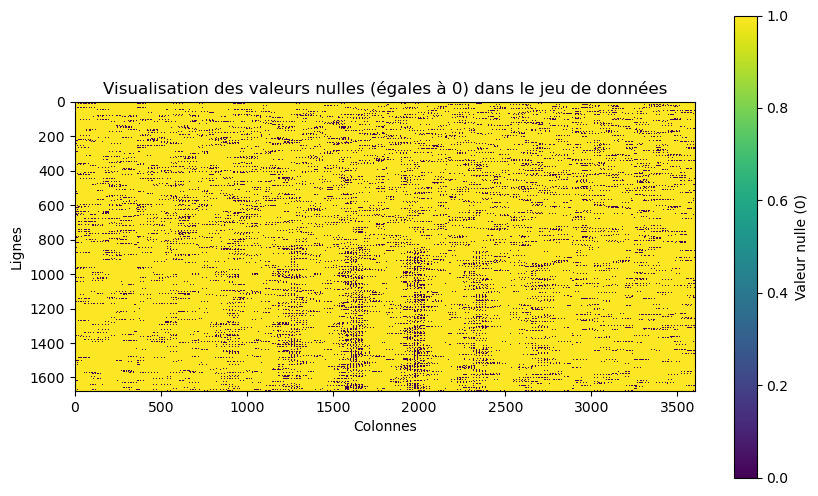

In [6]:
# Visualiser les valeurs nulles (égales à 0)
null_values_matrix = df == 0

plt.figure(figsize=(10, 6))

# Utilisez la fonction imshow pour visualiser la matrice binaire
plt.imshow(null_values_matrix, cmap='viridis', interpolation='nearest')

plt.title('Visualisation des valeurs nulles (égales à 0) dans le jeu de données')
plt.xlabel('Colonnes')
plt.ylabel('Lignes')

# Ajoutez une barre de couleur pour indiquer la valeur associée à chaque couleur
plt.colorbar(label='Valeur nulle (0)')

plt.show()

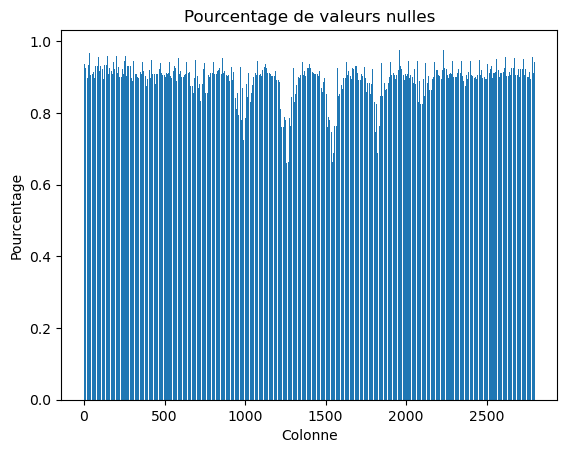

In [8]:
#on visualise le pourcentages des valeurs nulles qui restent dans les autres colonnes après la suppression de 800 colonnes entiérement nulles 
percentages = (X==0).mean()

# Création du graphique
plt.bar(range(len(percentages)), percentages)

# Titre du graphique
plt.title("Pourcentage de valeurs nulles")

# Axe des abscisses
plt.xlabel("Colonne")

# Axe des ordonnées
plt.ylabel("Pourcentage")

# Affichage du graphique
plt.show()

In [9]:
from sklearn.impute import KNNImputer
# Remplacer les zéros par NaN pour indiquer les valeurs manquantes
df1=X
df1.replace(0, np.nan, inplace=True)
imputer = KNNImputer()
df_imputed = imputer.fit_transform(df1)
print(df_imputed)

[[0.29347   0.097823  0.034586  ... 0.13484   0.40452   0.57208  ]
 [0.395754  0.1319202 0.084456  ... 0.0882156 0.264646  0.399084 ]
 [0.296996  0.0989978 0.1544578 ... 0.0661786 0.1985368 0.335282 ]
 ...
 [0.2362114 0.0787372 0.1466864 ... 0.0822972 0.2468866 0.366348 ]
 [0.250286  0.0834278 0.2110428 ... 0.0974716 0.292414  0.363832 ]
 [0.30812   0.1027062 0.11273   ... 0.1182652 0.3547958 0.29221  ]]


In [10]:
df_imputed = pd.DataFrame(df_imputed, columns=df1.columns)
df_imputed

,1,2,3,4,5,6,8,10,11,12,...,3587,3588,3590,3592,3593,3594,3595,3596,3597,3599
0,0.293470,0.097823,0.034586,0.034586,0.031712,0.095136,0.171222,0.440200,0.146730,0.138340,...,0.055809,0.167426,0.315046,0.606780,0.202260,0.143020,0.143020,0.134840,0.404520,0.572080
1,0.395754,0.131920,0.084456,0.084456,0.059683,0.179047,0.122740,0.364896,0.121631,0.181294,...,0.136815,0.410444,0.310446,0.347133,0.115712,0.217314,0.217314,0.088216,0.264646,0.399084
2,0.296996,0.098998,0.154458,0.154458,0.076249,0.228750,0.159360,0.301146,0.100382,0.105098,...,0.041257,0.123770,0.409105,0.388762,0.129587,0.092203,0.092203,0.066179,0.198537,0.335282
3,0.316050,0.105350,0.226608,0.226608,0.054462,0.163387,0.278534,0.413520,0.137839,0.319054,...,0.113717,0.341150,0.295598,0.472916,0.157640,0.209436,0.209436,0.075899,0.227695,0.267029
4,0.209384,0.069795,0.115919,0.115919,0.077405,0.232212,0.200924,0.346777,0.115591,0.270765,...,0.191074,0.573224,0.293000,0.316436,0.105480,0.123975,0.123975,0.100528,0.301580,0.199816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,0.353268,0.117754,0.111817,0.111817,0.069306,0.207916,0.238002,0.290111,0.096703,0.187744,...,0.163344,0.490032,0.301966,0.374262,0.124755,0.171805,0.171805,0.104063,0.312190,0.351240
1676,0.259006,0.086336,0.172174,0.172174,0.055404,0.166215,0.322680,0.332936,0.110978,0.110983,...,0.077506,0.232519,0.207652,0.515104,0.171703,0.294248,0.294248,0.088829,0.266482,0.420907
1677,0.236211,0.078737,0.146686,0.146686,0.087454,0.262361,0.367494,0.302340,0.100781,0.190443,...,0.076029,0.228090,0.860170,0.271778,0.090592,0.141447,0.141447,0.082297,0.246887,0.366348
1678,0.250286,0.083428,0.211043,0.211043,0.070341,0.211020,0.332962,0.309240,0.103080,0.118781,...,0.130396,0.391186,0.336410,0.419608,0.139870,0.290154,0.290154,0.097472,0.292414,0.363832


In [11]:
X

,1,2,3,4,5,6,8,10,11,12,...,3587,3588,3590,3592,3593,3594,3595,3596,3597,3599
0,0.29347,0.097823,0.034586,0.034586,NaN,NaN,NaN,0.4402,0.14673,0.13834,...,NaN,NaN,NaN,0.60678,0.20226,0.14302,0.14302,0.13484,0.40452,0.57208
1,NaN,NaN,NaN,NaN,NaN,NaN,0.12274,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.041257,0.12377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.076029,0.22809,0.86017,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


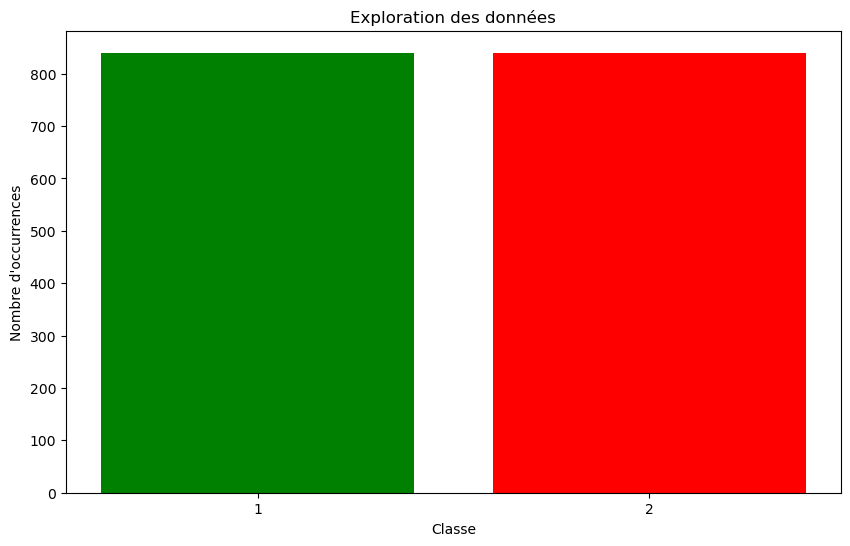

[1 2]
3600
1    840
2    840
Name: count, dtype: int64


In [12]:
# La dernière colonne soit la colonne -1 (dernière colonne)
#on a 2 labels pour 3600 attributs 
labels = df.iloc[:, -1].unique()
counts = df.iloc[:, -1].value_counts()

# Couleurs
colors = ['green', 'red']  # Tu peux ajuster les couleurs selon tes préférences

# Création du graphique
plt.figure(figsize=(10, 6))

for i, label in enumerate(labels):
    plt.bar(str(label), counts[label], color=colors[i])

plt.title("Exploration des données")
plt.xlabel("Classe")
plt.ylabel("Nombre d'occurrences")
plt.show()
print(labels)
print(counts)

In [13]:
# Calculez la matrice de corrélation
correlation_matrix = df_imputed.corr()

In [65]:
correlation_matrix 

,0.1,0.2,0.3,0.4,0.6,0.7,0.9,0.11,0.12,0.13,...,0.3110,0.3111,0.3113,0.3115,0.3116,0.3117,0.3118,0.3119,0.3120,0.3122
0.1,1.000000,1.000000,-0.189143,-0.189143,0.158159,0.158163,0.046775,-0.183653,-0.183649,-0.063583,...,0.029962,0.029958,-0.063113,0.006198,0.006194,0.002623,0.002623,-0.090491,-0.090492,0.047218
0.2,1.000000,1.000000,-0.189156,-0.189156,0.158147,0.158151,0.046762,-0.183655,-0.183650,-0.063584,...,0.029966,0.029962,-0.063112,0.006201,0.006197,0.002624,0.002624,-0.090491,-0.090492,0.047220
0.3,-0.189143,-0.189156,1.000000,1.000000,0.300734,0.300734,0.379022,0.139706,0.139707,0.018325,...,-0.063120,-0.063121,0.006971,-0.123101,-0.123103,-0.078012,-0.078012,0.052468,0.052465,-0.081536
0.4,-0.189143,-0.189156,1.000000,1.000000,0.300734,0.300734,0.379022,0.139706,0.139707,0.018325,...,-0.063120,-0.063121,0.006971,-0.123101,-0.123103,-0.078012,-0.078012,0.052468,0.052465,-0.081536
0.6,0.158159,0.158147,0.300734,0.300734,1.000000,1.000000,0.308527,0.071861,0.071862,-0.003293,...,-0.207292,-0.207298,0.037577,-0.208120,-0.208121,-0.059103,-0.059103,-0.017271,-0.017274,-0.086134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.3117,0.002623,0.002624,-0.078012,-0.078012,-0.059103,-0.059107,-0.135715,-0.023036,-0.023033,0.034308,...,0.105329,0.105326,0.010564,0.408863,0.408858,1.000000,1.000000,-0.363028,-0.363029,0.170090
0.3118,0.002623,0.002624,-0.078012,-0.078012,-0.059103,-0.059107,-0.135715,-0.023036,-0.023033,0.034308,...,0.105329,0.105326,0.010564,0.408863,0.408858,1.000000,1.000000,-0.363028,-0.363029,0.170090
0.3119,-0.090491,-0.090491,0.052468,0.052468,-0.017271,-0.017267,0.187369,0.032941,0.032940,-0.005864,...,-0.183597,-0.183594,-0.165248,-0.183136,-0.183129,-0.363028,-0.363028,1.000000,1.000000,-0.220356
0.3120,-0.090492,-0.090492,0.052465,0.052465,-0.017274,-0.017271,0.187367,0.032939,0.032938,-0.005864,...,-0.183601,-0.183599,-0.165239,-0.183137,-0.183130,-0.363029,-0.363029,1.000000,1.000000,-0.220354


In [14]:
df_imputed

,1,2,3,4,5,6,8,10,11,12,...,3587,3588,3590,3592,3593,3594,3595,3596,3597,3599
0,0.293470,0.097823,0.034586,0.034586,0.031712,0.095136,0.171222,0.440200,0.146730,0.138340,...,0.055809,0.167426,0.315046,0.606780,0.202260,0.143020,0.143020,0.134840,0.404520,0.572080
1,0.395754,0.131920,0.084456,0.084456,0.059683,0.179047,0.122740,0.364896,0.121631,0.181294,...,0.136815,0.410444,0.310446,0.347133,0.115712,0.217314,0.217314,0.088216,0.264646,0.399084
2,0.296996,0.098998,0.154458,0.154458,0.076249,0.228750,0.159360,0.301146,0.100382,0.105098,...,0.041257,0.123770,0.409105,0.388762,0.129587,0.092203,0.092203,0.066179,0.198537,0.335282
3,0.316050,0.105350,0.226608,0.226608,0.054462,0.163387,0.278534,0.413520,0.137839,0.319054,...,0.113717,0.341150,0.295598,0.472916,0.157640,0.209436,0.209436,0.075899,0.227695,0.267029
4,0.209384,0.069795,0.115919,0.115919,0.077405,0.232212,0.200924,0.346777,0.115591,0.270765,...,0.191074,0.573224,0.293000,0.316436,0.105480,0.123975,0.123975,0.100528,0.301580,0.199816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,0.353268,0.117754,0.111817,0.111817,0.069306,0.207916,0.238002,0.290111,0.096703,0.187744,...,0.163344,0.490032,0.301966,0.374262,0.124755,0.171805,0.171805,0.104063,0.312190,0.351240
1676,0.259006,0.086336,0.172174,0.172174,0.055404,0.166215,0.322680,0.332936,0.110978,0.110983,...,0.077506,0.232519,0.207652,0.515104,0.171703,0.294248,0.294248,0.088829,0.266482,0.420907
1677,0.236211,0.078737,0.146686,0.146686,0.087454,0.262361,0.367494,0.302340,0.100781,0.190443,...,0.076029,0.228090,0.860170,0.271778,0.090592,0.141447,0.141447,0.082297,0.246887,0.366348
1678,0.250286,0.083428,0.211043,0.211043,0.070341,0.211020,0.332962,0.309240,0.103080,0.118781,...,0.130396,0.391186,0.336410,0.419608,0.139870,0.290154,0.290154,0.097472,0.292414,0.363832


In [15]:
X_train, X_test, y_train, y_test = train_test_split(df_imputed, y, test_size=0.2, random_state=42)

# Affichage des tailles des ensembles
print("Taille de l'ensemble d'entraînement :", X_train.shape)
print("Taille de l'ensemble de validation :", X_test.shape)

y_train.value_counts()

Taille de l'ensemble d'entraînement : (1344, 2800)
Taille de l'ensemble de validation : (336, 2800)


3600
2    680
1    664
Name: count, dtype: int64

In [16]:
X_train.isnull()

,1,2,3,4,5,6,8,10,11,12,...,3587,3588,3590,3592,3593,3594,3595,3596,3597,3599
163,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
427,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
720,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
266,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
148,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1294,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
860,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression  
"""Meilleurs hyperparamètres SVM : {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Meilleurs hyperparamètres Régression logistique : {'C': 0.1, 'max_iter': 500}
Meilleurs hyperparamètres Forêt aléatoire : {'n_estimators': 200}0}"""
# Création du modèle de régression logistique
logistic_model = LogisticRegression(max_iter=500, random_state=42,C=0.1)
logistic_model.fit(X_train, y_train)

# Création du modèle SVM
svm_model = SVC(kernel='rbf', probability=True, random_state=42,gamma=0.1,C=10)
svm_model.fit(X_train, y_train)

# Création du modèle de forêt aléatoire
rndmForest_model = RandomForestClassifier(n_estimators=200, random_state=42)
rndmForest_model.fit(X_train, y_train)





RandomForestClassifier(n_estimators=200, random_state=42)

Mean cross_val accuracy = 0.7324420677361855
Accuracy: 0.7976190476190477
              precision    recall  f1-score   support

           1       0.83      0.77      0.80       176
           2       0.77      0.82      0.80       160

    accuracy                           0.80       336
   macro avg       0.80      0.80      0.80       336
weighted avg       0.80      0.80      0.80       336



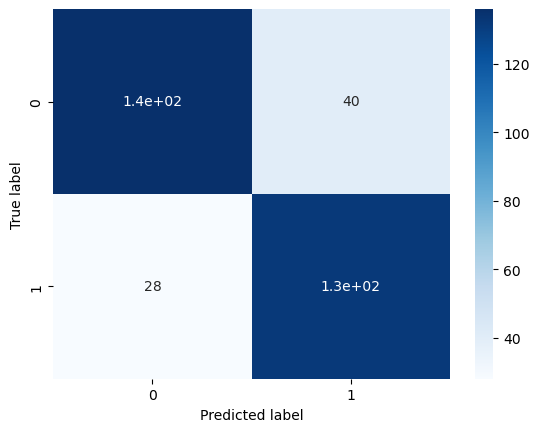

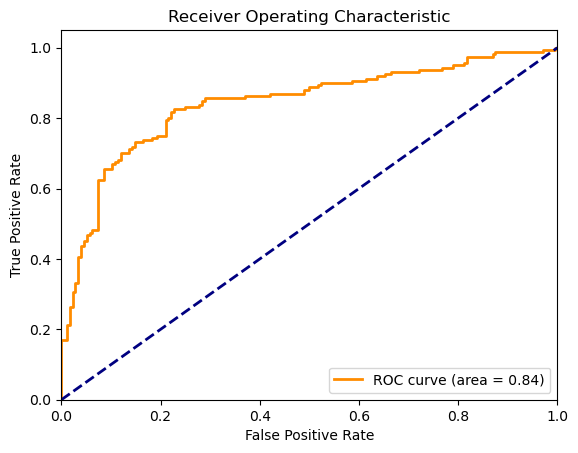

Accuracy on the training set: 0.8809523809523809
Accuracy on the testing set: 0.7976190476190477


In [18]:
# Check validation for Logistic regression
accuracy = model_selection.cross_val_score(logistic_model, X_test, y_test, cv=10).mean()
print("Mean cross_val accuracy =", accuracy)

# Cross-validation: Estime la performance du modèle en effectuant une validation croisée sur les données de test.
# X_test : les données de test

# y_test : les étiquettes de test
# cv=10 : effectue une validation croisée avec 10 plis (10-fold cross-validation)
# La performance moyenne sur les 10 plis est calculée et stockée dans la variable 'accuracy'.

logistic_predictions = logistic_model.predict(X_test)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, logistic_predictions))
print(classification_report(y_test, logistic_predictions))

# Accuracy_score : Calcule la précision du modèle sur les données de test.

# classification_report : Affiche des statistiques détaillées telles que la précision, le rappel et le F1-score pour chaque classe.

# CONFUSION MATRIX
cm = confusion_matrix(y_test, logistic_predictions)
heatmap(cm, annot=True, cmap="Blues")  # Crée une heatmap pour visualiser la matrice de confusion.
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

# ROC Curve
lb = LabelBinarizer()  # Transforme les étiquettes en valeurs binaires (0, 1)
y_train_binary = lb.fit_transform(y_train)
y_test_binary = lb.transform(y_test)
pred_score = logistic_model.predict_proba(X_test)
FPr, TPr, _ = roc_curve(y_test_binary, pred_score[:, 1])
roc_auc = auc(FPr, TPr)
plt.plot(FPr, TPr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# ROC Curve : Trace la courbe ROC pour évaluer la capacité du modèle à discriminer entre les classes.
# La zone sous la courbe (AUC) est également calculée pour quantifier la performance.

# Checking for overfitting
print("Accuracy on the training set:", accuracy_score(y_train, logistic_model.predict(X_train)))
print("Accuracy on the testing set:", accuracy_score(y_test, logistic_predictions))

# Vérification du surajustement : Compare la précision du modèle sur les ensembles d'entraînement et de test.
# Si l'accuracy sur l'ensemble d'entraînement est significativement plus élevée que sur l'ensemble de test,
# cela pourrait indiquer du surajustement.


Mean cross_val accuracy = 0.7380570409982175
Accuracy: 0.8125
              precision    recall  f1-score   support

           1       0.79      0.87      0.83       176
           2       0.84      0.75      0.79       160

    accuracy                           0.81       336
   macro avg       0.82      0.81      0.81       336
weighted avg       0.81      0.81      0.81       336



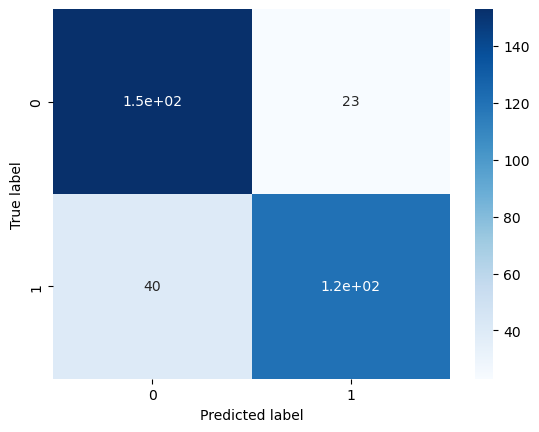

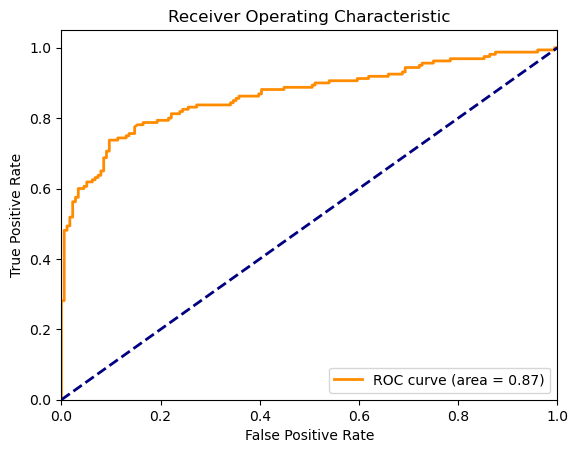

Accuracy on the training set: 1.0
Accuracy on the testing set: 0.8125


In [19]:
# Check validation for svm model
accuracy = model_selection.cross_val_score(svm_model, X_test, y_test, cv=10).mean()
print("Mean cross_val accuracy =", accuracy)

# Cross-validation: Estime la performance du modèle en effectuant une validation croisée sur les données de test.
# X_test : les données de test
# y_test : les étiquettes de test
# cv=10 : effectue une validation croisée avec 10 plis (10-fold cross-validation)
# La performance moyenne sur les 10 plis est calculée et stockée dans la variable 'accuracy'.

svm_predictions = svm_model.predict(X_test)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print(classification_report(y_test, svm_predictions))

# Accuracy_score : Calcule la précision du modèle sur les données de test.

# classification_report : Affiche des statistiques détaillées telles que la précision, le rappel et le F1-score pour chaque classe.

# CONFUSION MATRIX
cm = confusion_matrix(y_test, svm_predictions)
heatmap(cm, annot=True, cmap="Blues")  # Crée une heatmap pour visualiser la matrice de confusion.
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

# ROC Curve
lb = LabelBinarizer()  # Transforme les étiquettes en valeurs binaires (0, 1)
y_train_binary = lb.fit_transform(y_train)
y_test_binary = lb.transform(y_test)
pred_score = svm_model.predict_proba(X_test)
FPr, TPr, _ = roc_curve(y_test_binary, pred_score[:, 1])
roc_auc = auc(FPr, TPr)
plt.plot(FPr, TPr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# ROC Curve : Trace la courbe ROC pour évaluer la capacité du modèle à discriminer entre les classes.
# La zone sous la courbe (AUC) est également calculée pour quantifier la performance.

# Checking for overfitting
print("Accuracy on the training set:", accuracy_score(y_train, svm_model.predict(X_train)))
print("Accuracy on the testing set:", accuracy_score(y_test, svm_predictions))

# Vérification du surajustement : Compare la précision du modèle sur les ensembles d'entraînement et de test.
# Si l'accuracy sur l'ensemble d'entraînement est significativement plus élevée que sur l'ensemble de test,
# cela pourrait indiquer du surajustement.


Mean cross_val accuracy = 0.7259358288770054
Accuracy: 0.7797619047619048
              precision    recall  f1-score   support

           1       0.81      0.76      0.78       176
           2       0.75      0.80      0.78       160

    accuracy                           0.78       336
   macro avg       0.78      0.78      0.78       336
weighted avg       0.78      0.78      0.78       336



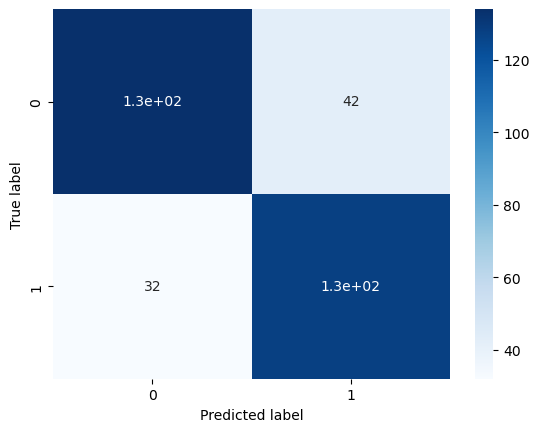

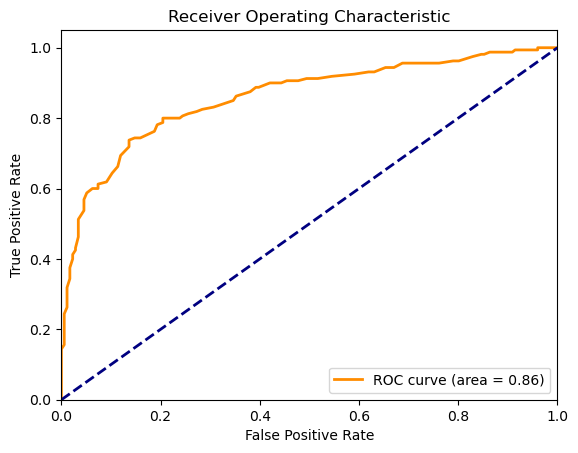

Accuracy on the training set: 1.0
Accuracy on the testing set: 0.7797619047619048


In [20]:
# Check validation for forest
accuracy = model_selection.cross_val_score(rndmForest_model, X_test, y_test, cv=10).mean()
print("Mean cross_val accuracy =", accuracy)

# Cross-validation: Estime la performance du modèle en effectuant une validation croisée sur les données de test.
# X_test : les données de test
# y_test : les étiquettes de test
# cv=10 : effectue une validation croisée avec 10 plis (10-fold cross-validation)
# La performance moyenne sur les 10 plis est calculée et stockée dans la variable 'accuracy'.

rndmForest_predictions = rndmForest_model.predict(X_test)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, rndmForest_predictions))
print(classification_report(y_test, rndmForest_predictions))

# Accuracy_score : Calcule la précision du modèle sur les données de test.

# classification_report : Affiche des statistiques détaillées telles que la précision, le rappel et le F1-score pour chaque classe.

# CONFUSION MATRIX
cm = confusion_matrix(y_test, rndmForest_predictions)
heatmap(cm, annot=True, cmap="Blues")  # Crée une heatmap pour visualiser la matrice de confusion.
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

# ROC Curve
lb = LabelBinarizer()  # Transforme les étiquettes en valeurs binaires (0, 1)
y_train_binary = lb.fit_transform(y_train)
y_test_binary = lb.transform(y_test)
pred_score = rndmForest_model.predict_proba(X_test)
FPr, TPr, _ = roc_curve(y_test_binary, pred_score[:, 1])
roc_auc = auc(FPr, TPr)
plt.plot(FPr, TPr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# ROC Curve : Trace la courbe ROC pour évaluer la capacité du modèle à discriminer entre les classes.
# La zone sous la courbe (AUC) est également calculée pour quantifier la performance.

# Checking for overfitting
print("Accuracy on the training set:", accuracy_score(y_train, rndmForest_model.predict(X_train)))
print("Accuracy on the testing set:", accuracy_score(y_test, rndmForest_predictions))

# Vérification du surajustement : Compare la précision du modèle sur les ensembles d'entraînement et de test.
# Si l'accuracy sur l'ensemble d'entraînement est significativement plus élevée que sur l'ensemble de test,
# cela pourrait indiquer du surajustement.


In [21]:
# Définir les hyperparamètres à tester pour la régression logistique
param_grid_logistic = {'C': [0.1, 1, 10], 'max_iter': [100, 500, 1000]}

# Création de l'objet GridSearchCV pour la régression logistique
logistic_grid = GridSearchCV(LogisticRegression(), param_grid_logistic, cv=5)

# Ajustement du modèle avec GridSearchCV sur les données d'entraînement
logistic_grid.fit(X_train, y_train)

# Meilleurs hyperparamètres pour la régression logistique
print("Meilleurs hyperparamètres Régression logistique :", logistic_grid.best_params_)

C:\Users\loubn\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\loubn\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Meilleurs hyperparamètres Régression logistique : {'C': 0.1, 'max_iter': 500}


In [22]:
# Définir les hyperparamètres à tester pour SVM
param_grid_svm = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Création de l'objet GridSearchCV pour SVM
svm_grid = GridSearchCV(SVC(), param_grid_svm, cv=5)

# Ajustement du modèle avec GridSearchCV sur les données d'entraînement
svm_grid.fit(X_train, y_train)

# Meilleurs hyperparamètres pour SVM
print("Meilleurs hyperparamètres SVM :", svm_grid.best_params_)

Meilleurs hyperparamètres SVM : {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [23]:
# Définir les hyperparamètres à tester pour la forêt aléatoire

param_grid_forest = {'n_estimators': [50, 100, 200]}
# Création de l'objet GridSearchCV pour la forêt aléatoire
forest_grid = GridSearchCV(RandomForestClassifier(), param_grid_forest, cv=5)

# Ajustement du modèle avec GridSearchCV sur les données d'entraînement
forest_grid.fit(X_train, y_train)

# Meilleurs hyperparamètres pour la forêt aléatoire
print("Meilleurs hyperparamètres Forêt aléatoire :", forest_grid.best_params_)

Meilleurs hyperparamètres Forêt aléatoire : {'n_estimators': 100}


In [ ]:
Meilleurs hyperparamètres Forêt aléatoire : {'n_estimators': 100}

In [24]:
# Prédiction sur l'ensemble de validation
logistic_pred = logistic_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
forest_pred = rndmForest_model.predict(X_test)
#knn_pred=knn_model.predict(X_test)
# Calcul des métriques
logistic_accuracy = accuracy_score(y_test, logistic_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
forest_accuracy = accuracy_score(y_test, forest_pred)
#knn_accuracy=accuracy_score(y_test,knn_pred)

# Affichage des performances
print("Accuracy Régression logistique :", logistic_accuracy)
print("Accuracy SVM :", svm_accuracy)
print("Accuracy Random Forest :", forest_accuracy)
#print("accuracy knn:",knn_accuracy)

Accuracy Régression logistique : 0.7976190476190477
Accuracy SVM : 0.8125
Accuracy Random Forest : 0.7797619047619048


In [25]:
# Rapport de classification pour chaque modèle
print("Rapport de classification Régression logistique :\n", classification_report(y_test, logistic_pred))
print("Rapport de classification SVM :\n", classification_report(y_test, svm_pred))
print("Rapport de classification Random Forest :\n", classification_report(y_test, forest_pred))
#print("Rapport de classification knn :\n", classification_report(y_test, knn_pred))


Rapport de classification Régression logistique :
               precision    recall  f1-score   support

           1       0.83      0.77      0.80       176
           2       0.77      0.82      0.80       160

    accuracy                           0.80       336
   macro avg       0.80      0.80      0.80       336
weighted avg       0.80      0.80      0.80       336

Rapport de classification SVM :
               precision    recall  f1-score   support

           1       0.79      0.87      0.83       176
           2       0.84      0.75      0.79       160

    accuracy                           0.81       336
   macro avg       0.82      0.81      0.81       336
weighted avg       0.81      0.81      0.81       336

Rapport de classification Random Forest :
               precision    recall  f1-score   support

           1       0.81      0.76      0.78       176
           2       0.75      0.80      0.78       160

    accuracy                           0.78       336
 

In [26]:
logistic_scores = cross_val_score(logistic_grid.best_estimator_, X_test, y_test, cv=5)
svm_scores = cross_val_score(svm_grid.best_estimator_, X_test, y_test, cv=5)
forest_scores = cross_val_score(forest_grid.best_estimator_, X_test, y_test, cv=5)
# Affichage des scores moyens
print("Score moyen Regression logistique :", logistic_scores.mean())
print("Score moyen SVM :", svm_scores.mean())
print("Score moyen SVM :", forest_scores.mean())


Score moyen Regression logistique : 0.7470149253731343
Score moyen SVM : 0.7262510974539069
Score moyen SVM : 0.6875768217734854


In [27]:
UDF= pd.read_csv("mars_unknown.csv",header=None,skiprows=0)

In [28]:
UDF

,0,1,2,3,4,5,6,7,8,9,...,3590,3591,3592,3593,3594,3595,3596,3597,3598,3599
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,...,0.00000,0,0.0000,0.000000,0.00000,0.00000,0.0,0.0,0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,...,0.00000,0,0.0000,0.000000,0.00000,0.00000,0.0,0.0,0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,...,0.00000,0,0.0000,0.000000,0.00000,0.00000,0.0,0.0,0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,...,0.00000,0,0.0000,0.000000,0.00000,0.00000,0.0,0.0,0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,...,0.00000,0,0.0000,0.000000,0.00000,0.00000,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,...,0.77388,0,0.0000,0.000000,0.00000,0.00000,0.0,0.0,0,0.0
416,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,...,0.00000,0,0.0000,0.000000,0.00000,0.00000,0.0,0.0,0,0.0
417,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,...,0.00000,0,0.0000,0.000000,0.00000,0.00000,0.0,0.0,0,0.0
418,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,...,0.00000,0,0.0000,0.000000,0.00000,0.00000,0.0,0.0,0,0.0


In [29]:
null_percentage = ((UDF==0).sum() / len(UDF)) * 100
null_percentage

0       100.000000
1        93.809524
2        93.809524
3        93.809524
4        93.809524
           ...    
3595     93.095238
3596     94.523810
3597     94.523810
3598    100.000000
3599     98.571429
Length: 3600, dtype: float64

In [30]:
X = UDF.loc[:, (UDF != 0).any(axis=0)]

In [31]:
X.shape

(420, 2800)

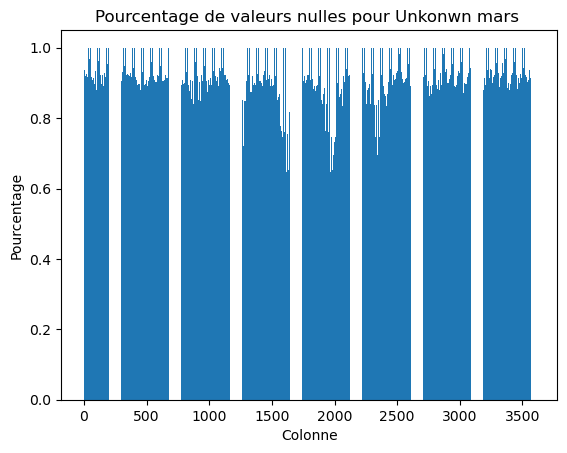

In [32]:
percentages = (UDF==0).mean()

# Création du graphique
plt.bar(range(len(percentages)), percentages)

# Titre du graphique
plt.title("Pourcentage de valeurs nulles pour Unkonwn mars ")

# Axe des abscisses
plt.xlabel("Colonne")

# Axe des ordonnées
plt.ylabel("Pourcentage")

# Affichage du graphique
plt.show()

In [18]:
#on supprimme tous les colonnes entierement nulles 
#X = UDF.loc[:, (df != 0).any(axis=0)]
from sklearn.impute import KNNImputer
# Remplacer les zéros par NaN pour indiquer les valeurs manquantes
udf1=X
udf1.replace(0, np.nan, inplace=True)
imputer = KNNImputer()
udf_imputed = imputer.fit_transform(udf1)
print(udf_imputed)


C:\Users\loubn\AppData\Local\Temp\ipykernel_6868\1009861562.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  udf1.replace(0, np.nan, inplace=True)


[[0.321496  0.107166  0.1465612 ... 0.0934554 0.280368  0.348316 ]
 [0.386236  0.128746  0.068144  ... 0.0944466 0.283338  0.3564536]
 [0.280504  0.0935012 0.1966668 ... 0.0847216 0.25417   0.348316 ]
 ...
 [0.2287914 0.0762634 0.126253  ... 0.0869224 0.2607636 0.280106 ]
 [0.433672  0.1445566 0.0755996 ... 0.1013488 0.304042  0.3564536]
 [0.306724  0.1022402 0.151002  ... 0.065301  0.1959056 0.3564536]]


In [23]:
# Les modèles avec les paramètres choisis :
# Faire des prédictions avec le modèle entraîné
prediction = svm_model.predict(udf_imputed)

results_df = pd.DataFrame(prediction, columns=None)
print(results_df)

# Enregistrement des prédictions sans en-tête
results_df.to_csv("predictions_mars_unknown7.csv", index=False, header=False)


     0
0    1
1    2
2    1
3    1
4    1
..  ..
415  1
416  2
417  1
418  2
419  2

[420 rows x 1 columns]


In [24]:
pred= pd.read_csv("predictions_mars_unknown7.csv",header=None,skiprows=0)

In [26]:
pred.shape


(420, 1)